In [10]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.impute import SimpleImputer

In [11]:
df = pd.read_csv("Titanic.csv")

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# imputer = SimpleImputer(strategy='mean')
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [16]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
df.drop(columns=['Cabin'], inplace = True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
X = df['Age'].values.reshape(-1, 1)
y = df['Fare'].values

<Axes: >

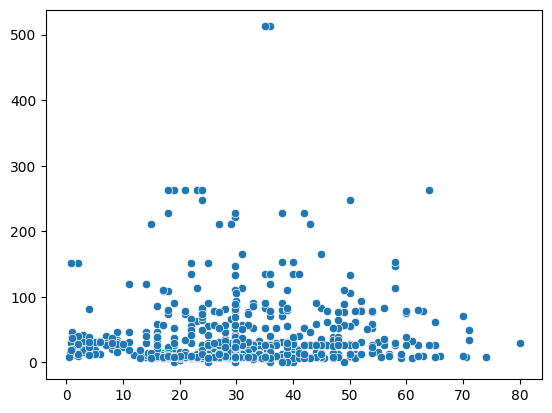

In [20]:
sns.scatterplot(x=X.flatten(), y=y)

In [ ]:
# class SimpleLinearRegression:

In [23]:
def fit_linear_regression(X, y):
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    numerator = np.sum((X -X_mean) * (y-y_mean))
    denominator = np.sum((X-X_mean)**2)

    slope = numerator / denominator
    intercept = y_mean - slope * X_mean

    return slope, intercept

In [24]:
def predict_linear_regression(X, slope, intercept):
    return intercept + slope * X

In [29]:
scratch_slope, scratch_intercept = fit_linear_regression(X, y)
scratch_prediction = predict_linear_regression(X, scratch_slope, scratch_intercept)

In [27]:
scratch_slope, scratch_intercept

(-1.4598423598925982e-15, 32.20420796857468)

In [30]:
sklearn_model = LinearRegression()

sklearn_model.fit(X, y)

sklearn_predictions = sklearn_model.predict(X)


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

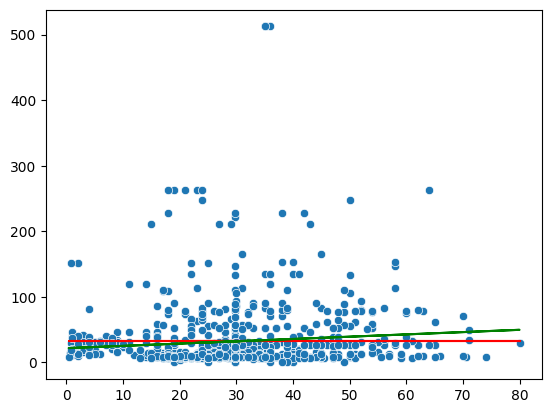

In [31]:
sns.scatterplot(x=X.flatten(), y=y)
plt.plot(X, scratch_prediction, color='red', label="From scratch model")
plt.plot(X, sklearn_predictions, color='green', label="SciKiut model Predictions")
plt.legend

In [33]:
scratch_mse = mean_squared_error(y, scratch_prediction)
scratch_r2 = r2_score(y, scratch_prediction)

sklearn_mse = mean_squared_error(y, sklearn_predictions)
sklearn_r2 = r2_score(y, sklearn_predictions)
